In [28]:
import pandas as pd
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Charger les données
train_full = pd.read_csv("train_full.csv")
test_full  = pd.read_csv("test_full.csv")

print(train_full.shape)
print(test_full.shape)

train_full.head()




(9196, 24)
(2288, 22)


,Id,week,region_code,region_name,TauxGrippe,year,week_num,month,t,pmer,...,TauxGrippe_google,pop_0_19,pop_20_39,pop_40_59,pop_60_74,pop_75_plus,pop_total,requete_grippe,requete_grippe_aviaire_vaccin,requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie
0,5523,201152,42,ALSACE,66,2011,52,12,278.613306,101860.544355,...,66,448112,479905,526481,250849,146978,1852325,2,2,2
1,5524,201152,72,AQUITAINE,24,2011,52,12,282.006707,102447.682927,...,24,732120,765143,896030,516065,344875,3254233,2,2,2
2,5525,201152,83,AUVERGNE,91,2011,52,12,278.906452,102179.798387,...,91,294709,305778,375485,223830,150880,1350682,3,3,2
3,5526,201152,25,BASSE-NORMANDIE,49,2011,52,12,281.327209,101840.124031,...,49,354514,336201,401766,228888,154315,1475684,2,2,2
4,5527,201152,26,BOURGOGNE,33,2011,52,12,278.612857,102035.428571,...,33,372023,369737,450664,269109,181201,1642734,2,2,1


In [29]:


# enlever la colonne
train_full = train_full.drop(columns=["TauxGrippe_google"])
train_full.columns


Index(['Id', 'week', 'region_code', 'region_name', 'TauxGrippe', 'year',
       'week_num', 'month', 't', 'pmer', 'ff', 'rr24', 'u', 'Id_google',
       'pop_0_19', 'pop_20_39', 'pop_40_59', 'pop_60_74', 'pop_75_plus',
       'pop_total', 'requete_grippe', 'requete_grippe_aviaire_vaccin',
       'requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie'],
      dtype='object')

In [26]:

test_full  = pd.read_csv("test_full.csv")
test_full.head()
test_full.columns

Index(['Id', 'week', 'region_code', 'region_name', 'year', 'week_num', 'month',
       't', 'pmer', 'ff', 'rr24', 'u', 'Id_google', 'pop_0_19', 'pop_20_39',
       'pop_40_59', 'pop_60_74', 'pop_75_plus', 'pop_total', 'requete_grippe',
       'requete_grippe_aviaire_vaccin',
       'requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie'],
      dtype='object')

Chargement des données...
Train: (9196, 23), Test: (2288, 23), Combined: (11484, 23)

Feature Engineering...
Nombre de features: 42
TauxGrippe_google dans features ? False

Train: (8030, 42), Validation: (1144, 42)

=== ENTRAÎNEMENT XGBOOST ===
[0]	validation_0-rmse:160.08009
[50]	validation_0-rmse:73.16810
[100]	validation_0-rmse:73.06703
[150]	validation_0-rmse:73.66035
[200]	validation_0-rmse:75.03195
[250]	validation_0-rmse:75.52367
[300]	validation_0-rmse:76.84490
[350]	validation_0-rmse:77.35360
[400]	validation_0-rmse:77.95986
[450]	validation_0-rmse:78.90499
[500]	validation_0-rmse:79.16792
[550]	validation_0-rmse:80.13624
[599]	validation_0-rmse:81.04604

=== ÉVALUATION ===
RMSE sur validation: 81.05
MAE sur validation: 49.65


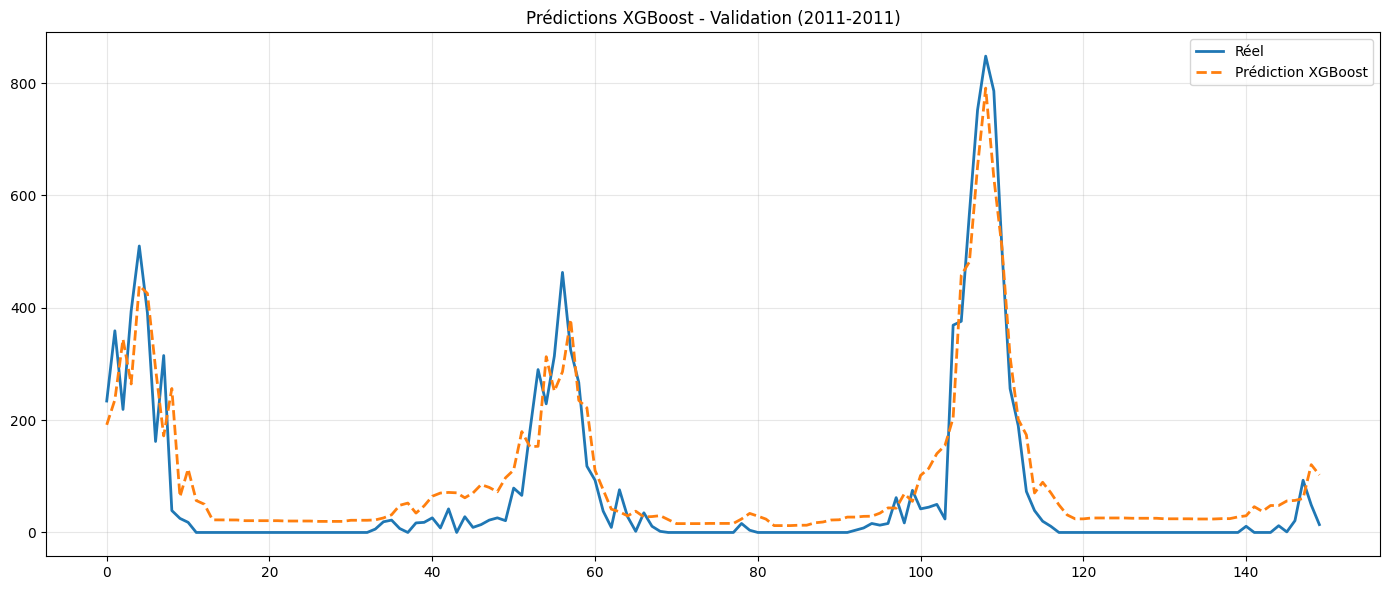


=== TOP 10 FEATURES IMPORTANTES ===
                              feature  importance
18                          Taux_Lag1    0.246719
40  region_PROVENCE-ALPES-COTE-D-AZUR    0.062639
20                      Taux_Rolling3    0.057609
1                                year    0.037194
2                            week_num    0.036913
36          region_NORD-PAS-DE-CALAIS    0.032811
8                           Id_google    0.028425
23             region_BASSE-NORMANDIE    0.027348
33                    region_LIMOUSIN    0.026800
15                     requete_grippe    0.026791

=== PRÉDICTION RÉCURSIVE SUR TEST ===
Prédiction pour 104 semaines...
  Semaine 201210 (10/104) - moyenne preds: 263.73
  Semaine 201220 (20/104) - moyenne preds: 62.73
  Semaine 201230 (30/104) - moyenne preds: 58.94
  Semaine 201240 (40/104) - moyenne preds: 82.91
  Semaine 201250 (50/104) - moyenne preds: 274.84
  Semaine 201308 (60/104) - moyenne preds: 270.77
  Semaine 201318 (70/104) - moyenne preds: 68

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# =========================
# 1) CHARGEMENT
# =========================
print("Chargement des données...")
train_df = pd.read_csv("train_full.csv")
test_df  = pd.read_csv("test_full.csv")

# Enlever la variable qui fout le bordel (leak)
train_df = train_df.drop(columns=["TauxGrippe_google"], errors="ignore")
test_df  = test_df.drop(columns=["TauxGrippe_google"], errors="ignore")

# Ajouter la cible vide dans le test pour concat
test_df["TauxGrippe"] = np.nan

# Combine
df = pd.concat([train_df, test_df], ignore_index=True)
print(f"Train: {train_df.shape}, Test: {test_df.shape}, Combined: {df.shape}")

# =========================
# 2) FEATURE ENGINEERING
# =========================
print("\nFeature Engineering...")
df["year"] = df["week"].astype(str).str[:4].astype(int)
df["week_num"] = df["week"].astype(str).str[4:].astype(int)

# tri (crucial pour lags)
df = df.sort_values(["region_name", "week"]).reset_index(drop=True)

# lags + rolling (par région)
df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)

# one-hot région (on garde region_name dans df pour groupby + boucle)
region_dummies = pd.get_dummies(df["region_name"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)

# =========================
# 3) FEATURES
# =========================
exclude_cols = [
    "Id", "week", "TauxGrippe", "TauxGrippe_google",  # <= important
    "region_name", "week_date", "month_date", "month"
]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Nombre de features: {len(features)}")
print("TauxGrippe_google dans features ?", "TauxGrippe_google" in features)  # doit être False

# =========================
# 4) TRAIN / VALID
# =========================
train_mask = df["TauxGrippe"].notna() & df["Taux_Lag1"].notna()
train_data = df[train_mask].copy()

max_year = train_data["year"].max()
split_year = max_year - 1  # dernière année = validation

X_train = train_data[train_data["year"] <= split_year][features]
y_train = train_data[train_data["year"] <= split_year]["TauxGrippe"]

X_val = train_data[train_data["year"] > split_year][features]
y_val = train_data[train_data["year"] > split_year]["TauxGrippe"]

print(f"\nTrain: {X_train.shape}, Validation: {X_val.shape}")

# =========================
# 5) XGBOOST
# =========================
print("\n=== ENTRAÎNEMENT XGBOOST ===")

params = {
    "objective": "reg:squarederror",
    "max_depth": 6,
    "learning_rate": 0.05,
    "n_estimators": 600,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 3,
    "gamma": 0.1,
    "reg_alpha": 0.1,
    "reg_lambda": 1.0,
    "random_state": 42,
    "n_jobs": -1
}


model = xgb.XGBRegressor(**params)

# (sans early_stopping_rounds pour éviter ton erreur)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=50
)

# =========================
# 6) EVAL
# =========================
print("\n=== ÉVALUATION ===")
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)
print(f"RMSE sur validation: {rmse:.2f}")
print(f"MAE sur validation: {mae:.2f}")

plt.figure(figsize=(14, 6))
plt.plot(y_val.values[:150], label="Réel", linewidth=2)
plt.plot(val_preds[:150], label="Prédiction XGBoost", linestyle="--", linewidth=2)
plt.title(f"Prédictions XGBoost - Validation ({split_year+1}-{max_year})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

importance_df = pd.DataFrame({
    "feature": features,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print("\n=== TOP 10 FEATURES IMPORTANTES ===")
print(importance_df.head(10))

# =========================
# 7) PRÉDICTION RÉCURSIVE TEST
# =========================
print("\n=== PRÉDICTION RÉCURSIVE SUR TEST ===")
test_weeks = sorted(test_df["week"].unique())
print(f"Prédiction pour {len(test_weeks)} semaines...")

for i, week in enumerate(test_weeks, 1):
    # recalcul lags (car on remplit au fur et à mesure)
    df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
    df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
    df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )

    current_mask = (df["week"] == week)
    X_current = df.loc[current_mask, features].copy()

    if X_current.isnull().any().any():
        X_current = X_current.fillna(0)

    y_pred = model.predict(X_current)

    # éviter valeurs négatives
    y_pred = np.maximum(y_pred, 0)

    df.loc[current_mask, "TauxGrippe"] = y_pred

    if i % 10 == 0:
        print(f"  Semaine {week} ({i}/{len(test_weeks)}) - moyenne preds: {y_pred.mean():.2f}")

print("✓ Prédiction terminée!")

# =========================
# 8) SUBMISSION
# =========================
print("\n=== CRÉATION SUBMISSION ===")
submission = df[df["week"].isin(test_weeks)][["Id", "TauxGrippe"]].copy()
submission["Id"] = submission["Id"].astype(int)
submission = submission.sort_values("Id")

# adapte le chemin si ton dossier results/submissions existe
submission.to_csv("../results/submissions/submission_xgboost.csv", index=False)

print(f"Submission sauvegardée: {submission.shape}")
print(submission.head(10))
print("✅ TERMINÉ! Fichier: ../results/submissions/submission_xgboost.csv")


On change les hypermapatres 


Chargement des données...
Train: (9196, 23), Test: (2288, 23), Combined: (11484, 23)

Feature Engineering...
Nombre de features: 42
TauxGrippe_google dans features ? False

Train: (8030, 42), Validation: (1144, 42)

=== ENTRAÎNEMENT XGBOOST ===
[0]	validation_0-rmse:165.36432
[50]	validation_0-rmse:97.62684
[100]	validation_0-rmse:84.81233
[150]	validation_0-rmse:85.88021
[200]	validation_0-rmse:86.46046
[250]	validation_0-rmse:86.99873
[300]	validation_0-rmse:87.84647
[350]	validation_0-rmse:88.27998
[400]	validation_0-rmse:88.85587
[450]	validation_0-rmse:89.21341
[500]	validation_0-rmse:89.58338
[550]	validation_0-rmse:90.16042
[600]	validation_0-rmse:90.28213
[650]	validation_0-rmse:90.54600
[700]	validation_0-rmse:90.84449
[750]	validation_0-rmse:91.09784
[800]	validation_0-rmse:91.23957
[850]	validation_0-rmse:91.31425
[900]	validation_0-rmse:91.32601
[950]	validation_0-rmse:91.42872
[999]	validation_0-rmse:91.57461

=== ÉVALUATION ===
RMSE sur validation: 91.57
MAE sur validatio

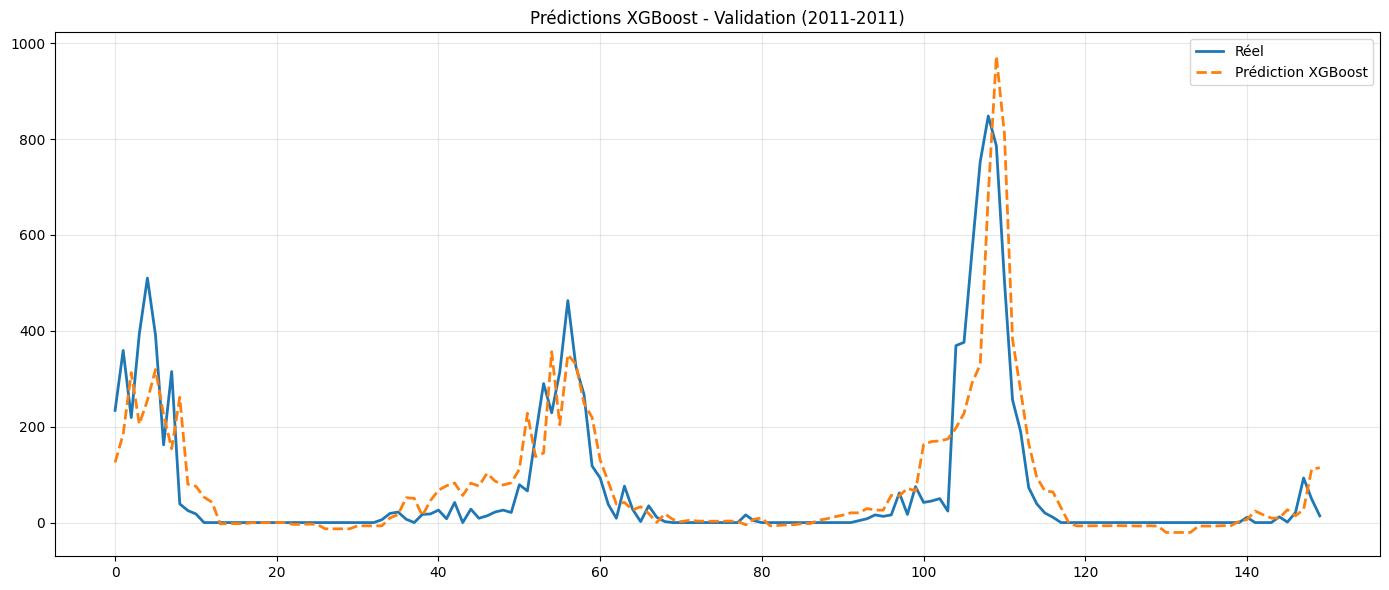


=== TOP 10 FEATURES IMPORTANTES ===
                                              feature  importance
18                                          Taux_Lag1    0.317879
36                          region_NORD-PAS-DE-CALAIS    0.071281
23                             region_BASSE-NORMANDIE    0.044035
15                                     requete_grippe    0.031854
37                            region_PAYS-DE-LA-LOIRE    0.030252
27                           region_CHAMPAGNE-ARDENNE    0.028558
17  requete_grippe_aviaire_vaccin_porcine_porc_H1N...    0.026575
35                               region_MIDI-PYRENEES    0.025985
33                                    region_LIMOUSIN    0.023615
21                                   region_AQUITAINE    0.022941

=== PRÉDICTION RÉCURSIVE SUR TEST ===
Prédiction pour 104 semaines...
  Semaine 201210 (10/104) - moyenne preds: 231.01
  Semaine 201220 (20/104) - moyenne preds: 79.51
  Semaine 201230 (30/104) - moyenne preds: 56.41
  Semaine 201240 (

In [34]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# =========================
# 1) CHARGEMENT
# =========================
print("Chargement des données...")
train_df = pd.read_csv("train_full.csv")
test_df  = pd.read_csv("test_full.csv")

# Enlever la variable qui fout le bordel (leak)
train_df = train_df.drop(columns=["TauxGrippe_google"], errors="ignore")
test_df  = test_df.drop(columns=["TauxGrippe_google"], errors="ignore")

# Ajouter la cible vide dans le test pour concat
test_df["TauxGrippe"] = np.nan

# Combine
df = pd.concat([train_df, test_df], ignore_index=True)
print(f"Train: {train_df.shape}, Test: {test_df.shape}, Combined: {df.shape}")

# =========================
# 2) FEATURE ENGINEERING
# =========================
print("\nFeature Engineering...")
df["year"] = df["week"].astype(str).str[:4].astype(int)
df["week_num"] = df["week"].astype(str).str[4:].astype(int)

# tri (crucial pour lags)
df = df.sort_values(["region_name", "week"]).reset_index(drop=True)

# lags + rolling (par région)
df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)

# one-hot région (on garde region_name dans df pour groupby + boucle)
region_dummies = pd.get_dummies(df["region_name"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)

# =========================
# 3) FEATURES
# =========================
exclude_cols = [
    "Id", "week", "TauxGrippe", "TauxGrippe_google",  # <= important
    "region_name", "week_date", "month_date", "month"
]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Nombre de features: {len(features)}")
print("TauxGrippe_google dans features ?", "TauxGrippe_google" in features)  # doit être False

# =========================
# 4) TRAIN / VALID
# =========================
train_mask = df["TauxGrippe"].notna() & df["Taux_Lag1"].notna()
train_data = df[train_mask].copy()

max_year = train_data["year"].max()
split_year = max_year - 1  # dernière année = validation

X_train = train_data[train_data["year"] <= split_year][features]
y_train = train_data[train_data["year"] <= split_year]["TauxGrippe"]

X_val = train_data[train_data["year"] > split_year][features]
y_val = train_data[train_data["year"] > split_year]["TauxGrippe"]

print(f"\nTrain: {X_train.shape}, Validation: {X_val.shape}")

# =========================
# 5) XGBOOST
# =========================
print("\n=== ENTRAÎNEMENT XGBOOST ===")

params = {
    "max_depth": 8,          # Plus profond (était 6)
    "learning_rate": 0.03,   # Plus lent (était 0.05)
    "n_estimators": 1000,    # Plus d'arbres (était 600)
    "min_child_weight": 1,   # Moins strict (était 3)
}


model = xgb.XGBRegressor(**params)

# (sans early_stopping_rounds pour éviter ton erreur)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=50
)

# =========================
# 6) EVAL
# =========================
print("\n=== ÉVALUATION ===")
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)
print(f"RMSE sur validation: {rmse:.2f}")
print(f"MAE sur validation: {mae:.2f}")

plt.figure(figsize=(14, 6))
plt.plot(y_val.values[:150], label="Réel", linewidth=2)
plt.plot(val_preds[:150], label="Prédiction XGBoost", linestyle="--", linewidth=2)
plt.title(f"Prédictions XGBoost - Validation ({split_year+1}-{max_year})")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

importance_df = pd.DataFrame({
    "feature": features,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print("\n=== TOP 10 FEATURES IMPORTANTES ===")
print(importance_df.head(10))

# =========================
# 7) PRÉDICTION RÉCURSIVE TEST
# =========================
print("\n=== PRÉDICTION RÉCURSIVE SUR TEST ===")
test_weeks = sorted(test_df["week"].unique())
print(f"Prédiction pour {len(test_weeks)} semaines...")

for i, week in enumerate(test_weeks, 1):
    # recalcul lags (car on remplit au fur et à mesure)
    df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
    df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
    df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )

    current_mask = (df["week"] == week)
    X_current = df.loc[current_mask, features].copy()

    if X_current.isnull().any().any():
        X_current = X_current.fillna(0)

    y_pred = model.predict(X_current)

    # éviter valeurs négatives
    y_pred = np.maximum(y_pred, 0)

    df.loc[current_mask, "TauxGrippe"] = y_pred

    if i % 10 == 0:
        print(f"  Semaine {week} ({i}/{len(test_weeks)}) - moyenne preds: {y_pred.mean():.2f}")

print("✓ Prédiction terminée!")

# =========================
# 8) SUBMISSION
# =========================
print("\n=== CRÉATION SUBMISSION ===")
submission = df[df["week"].isin(test_weeks)][["Id", "TauxGrippe"]].copy()
submission["Id"] = submission["Id"].astype(int)
submission = submission.sort_values("Id")

# adapte le chemin si ton dossier results/submissions existe
submission.to_csv("../results/submissions/submission_xgboost.csv", index=False)

print(f"Submission sauvegardée: {submission.shape}")
print(submission.head(10))
print("✅ TERMINÉ! Fichier: ../results/submissions/submission_xgboost.csv")


grid search

Chargement des données...
Train: (9196, 23), Test: (2288, 23)

Feature Engineering...
Nombre de features: 45

Train: (8030, 45), Validation: (1144, 45)

🔍 GRID SEARCH POUR TROUVER LES MEILLEURS HYPERPARAMÈTRES

[1/5] Test config: max_depth=6, lr=0.05, mcw=3
   → RMSE: 80.62, MAE: 45.61

[2/5] Test config: max_depth=5, lr=0.03, mcw=5
   → RMSE: 78.48, MAE: 47.90

[3/5] Test config: max_depth=7, lr=0.04, mcw=2
   → RMSE: 78.32, MAE: 44.39

[4/5] Test config: max_depth=4, lr=0.02, mcw=7
   → RMSE: 77.46, MAE: 51.87

[5/5] Test config: max_depth=6, lr=0.04, mcw=4
   → RMSE: 79.68, MAE: 46.35

🏆 MEILLEURE CONFIGURATION
Config #4 - RMSE: 77.46, MAE: 51.87
Paramètres: {'max_depth': 4, 'learning_rate': 0.02, 'min_child_weight': 7, 'subsample': 0.6, 'colsample_bytree': 0.6, 'reg_alpha': 1.0}

🚀 ENTRAÎNEMENT AVEC LES MEILLEURS PARAMÈTRES

✅ RMSE Final: 77.46
✅ MAE Final: 51.87


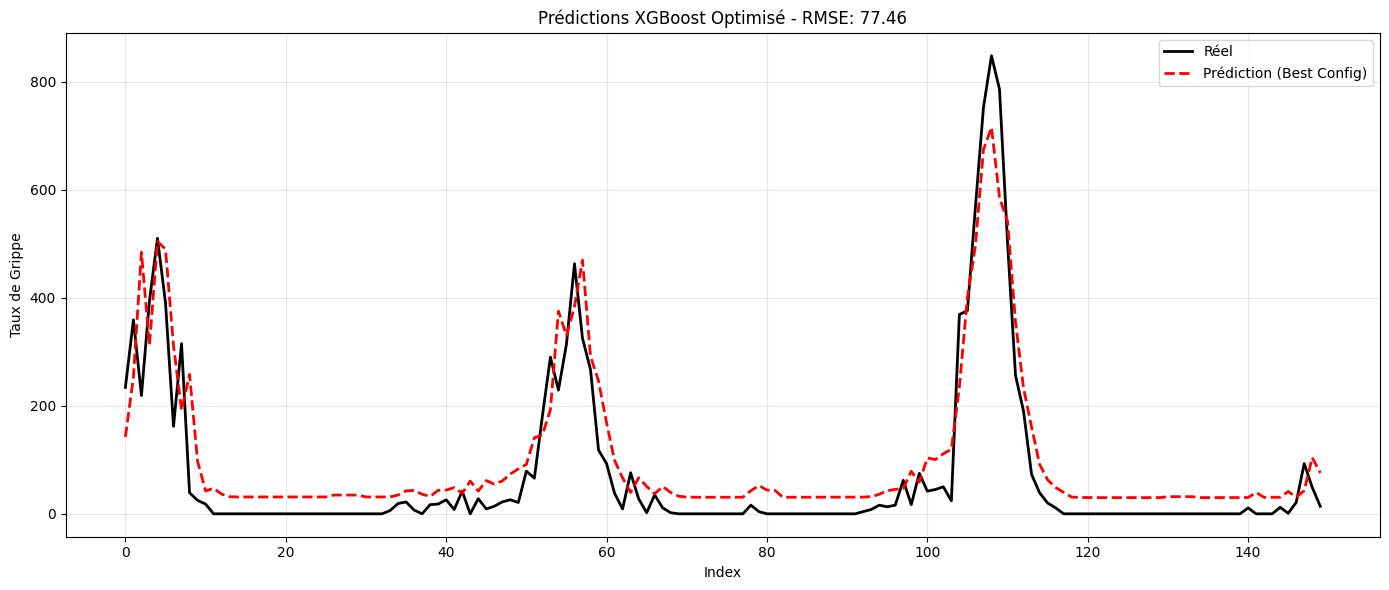


=== TOP 10 FEATURES ===
                                              feature  importance
18                                          Taux_Lag1    0.213604
21                                      Taux_Rolling3    0.093925
19                                          Taux_Lag2    0.041024
22                                  Taux_Rolling_std3    0.038072
2                                            week_num    0.037962
23                                        Lag1_x_week    0.036799
36                                    region_LIMOUSIN    0.033503
17  requete_grippe_aviaire_vaccin_porcine_porc_H1N...    0.032277
42                            region_POITOU-CHARENTES    0.030702
10                                          pop_20_39    0.024408

=== PRÉDICTION RÉCURSIVE TEST ===
  Semaine 201220 (20/104)
  Semaine 201240 (40/104)
  Semaine 201308 (60/104)
  Semaine 201328 (80/104)
  Semaine 201348 (100/104)

✅ Submission sauvegardée: (2288, 2)
Stats: Min=54.0, Max=782.8, Mean=202.6
       

In [35]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# =========================
# 1) CHARGEMENT
# =========================
print("Chargement des données...")
train_df = pd.read_csv("train_full.csv")
test_df  = pd.read_csv("test_full.csv")

train_df = train_df.drop(columns=["TauxGrippe_google"], errors="ignore")
test_df  = test_df.drop(columns=["TauxGrippe_google"], errors="ignore")

test_df["TauxGrippe"] = np.nan
df = pd.concat([train_df, test_df], ignore_index=True)

print(f"Train: {train_df.shape}, Test: {test_df.shape}")

# =========================
# 2) FEATURE ENGINEERING
# =========================
print("\nFeature Engineering...")
df["year"] = df["week"].astype(str).str[:4].astype(int)
df["week_num"] = df["week"].astype(str).str[4:].astype(int)

df = df.sort_values(["region_name", "week"]).reset_index(drop=True)

# Lags
df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
df["Taux_Lag3"] = df.groupby("region_name")["TauxGrippe"].shift(3)

# Rolling features
df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)
df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).std()
)

# Interaction saisonnalité
df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]

# One-hot région
region_dummies = pd.get_dummies(df["region_name"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)

# =========================
# 3) FEATURES
# =========================
exclude_cols = [
    "Id", "week", "TauxGrippe", "TauxGrippe_google",
    "region_name", "week_date", "month_date", "month"
]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Nombre de features: {len(features)}")

# =========================
# 4) TRAIN / VALID
# =========================
train_mask = df["TauxGrippe"].notna() & df["Taux_Lag1"].notna()
train_data = df[train_mask].copy()

max_year = train_data["year"].max()
split_year = max_year - 1

X_train = train_data[train_data["year"] <= split_year][features]
y_train = train_data[train_data["year"] <= split_year]["TauxGrippe"]

X_val = train_data[train_data["year"] > split_year][features]
y_val = train_data[train_data["year"] > split_year]["TauxGrippe"]

print(f"\nTrain: {X_train.shape}, Validation: {X_val.shape}")

# =========================
# 5) GRID SEARCH MANUEL
# =========================
print("\n" + "="*60)
print("🔍 GRID SEARCH POUR TROUVER LES MEILLEURS HYPERPARAMÈTRES")
print("="*60)

# Grille de paramètres à tester
param_grid = [
    # Configuration 1: Original (baseline)
    {"max_depth": 6, "learning_rate": 0.05, "min_child_weight": 3, 
     "subsample": 0.8, "colsample_bytree": 0.8, "reg_alpha": 0.1},
    
    # Configuration 2: Plus conservateur (anti-overfitting)
    {"max_depth": 5, "learning_rate": 0.03, "min_child_weight": 5, 
     "subsample": 0.7, "colsample_bytree": 0.7, "reg_alpha": 0.5},
    
    # Configuration 3: Plus agressif
    {"max_depth": 7, "learning_rate": 0.04, "min_child_weight": 2, 
     "subsample": 0.85, "colsample_bytree": 0.85, "reg_alpha": 0.05},
    
    # Configuration 4: Très conservateur
    {"max_depth": 4, "learning_rate": 0.02, "min_child_weight": 7, 
     "subsample": 0.6, "colsample_bytree": 0.6, "reg_alpha": 1.0},
    
    # Configuration 5: Équilibré
    {"max_depth": 6, "learning_rate": 0.04, "min_child_weight": 4, 
     "subsample": 0.75, "colsample_bytree": 0.75, "reg_alpha": 0.3},
]

results = []

for i, params in enumerate(param_grid, 1):
    print(f"\n[{i}/{len(param_grid)}] Test config: max_depth={params['max_depth']}, lr={params['learning_rate']}, mcw={params['min_child_weight']}")
    
    full_params = {
        "objective": "reg:squarederror",
        "n_estimators": 500,
        "gamma": 0.1,
        "reg_lambda": 1.0,
        "random_state": 42,
        "n_jobs": -1,
        **params
    }
    
    model = xgb.XGBRegressor(**full_params)
    model.fit(X_train, y_train, verbose=0)
    
    val_preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    mae = mean_absolute_error(y_val, val_preds)
    
    results.append({
        "config": i,
        "rmse": rmse,
        "mae": mae,
        "params": params
    })
    
    print(f"   → RMSE: {rmse:.2f}, MAE: {mae:.2f}")

# Trouver le meilleur
results_df = pd.DataFrame(results)
best_config = results_df.loc[results_df["rmse"].idxmin()]

print("\n" + "="*60)
print("🏆 MEILLEURE CONFIGURATION")
print("="*60)
print(f"Config #{int(best_config['config'])} - RMSE: {best_config['rmse']:.2f}, MAE: {best_config['mae']:.2f}")
print(f"Paramètres: {best_config['params']}")

# =========================
# 6) ENTRAÎNEMENT FINAL
# =========================
print("\n" + "="*60)
print("🚀 ENTRAÎNEMENT AVEC LES MEILLEURS PARAMÈTRES")
print("="*60)

best_params = {
    "objective": "reg:squarederror",
    "n_estimators": 500,
    "gamma": 0.1,
    "reg_lambda": 1.0,
    "random_state": 42,
    "n_jobs": -1,
    **best_config['params']
}

final_model = xgb.XGBRegressor(**best_params)
final_model.fit(X_train, y_train, verbose=0)

val_preds = final_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)

print(f"\n✅ RMSE Final: {rmse:.2f}")
print(f"✅ MAE Final: {mae:.2f}")

# Visualisation
plt.figure(figsize=(14, 6))
plt.plot(y_val.values[:150], label="Réel", linewidth=2, color='black')
plt.plot(val_preds[:150], label="Prédiction (Best Config)", linestyle="--", linewidth=2, color='red')
plt.title(f"Prédictions XGBoost Optimisé - RMSE: {rmse:.2f}")
plt.xlabel("Index")
plt.ylabel("Taux de Grippe")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Feature Importance
importance_df = pd.DataFrame({
    "feature": features,
    "importance": final_model.feature_importances_
}).sort_values("importance", ascending=False)

print("\n=== TOP 10 FEATURES ===")
print(importance_df.head(10))

# =========================
# 7) PRÉDICTION RÉCURSIVE
# =========================
print("\n=== PRÉDICTION RÉCURSIVE TEST ===")
test_weeks = sorted(test_df["week"].unique())

for i, week in enumerate(test_weeks, 1):
    df["Taux_Lag1"] = df.groupby("region_name")["TauxGrippe"].shift(1)
    df["Taux_Lag2"] = df.groupby("region_name")["TauxGrippe"].shift(2)
    df["Taux_Lag3"] = df.groupby("region_name")["TauxGrippe"].shift(3)
    
    df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )
    df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).std()
    )
    df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]
    
    current_mask = (df["week"] == week)
    X_current = df.loc[current_mask, features].copy()
    
    if X_current.isnull().any().any():
        X_current = X_current.fillna(0)
    
    y_pred = final_model.predict(X_current)
    y_pred = np.maximum(y_pred, 0)
    
    df.loc[current_mask, "TauxGrippe"] = y_pred
    
    if i % 20 == 0:
        print(f"  Semaine {week} ({i}/{len(test_weeks)})")

# =========================
# 8) SUBMISSION
# =========================
submission = df[df["week"].isin(test_weeks)][["Id", "TauxGrippe"]].copy()
submission["Id"] = submission["Id"].astype(int)
submission = submission.sort_values("Id")

submission.to_csv("submission_xgboost_optimized.csv", index=False)

print(f"\n✅ Submission sauvegardée: {submission.shape}")
print(f"Stats: Min={submission['TauxGrippe'].min():.1f}, Max={submission['TauxGrippe'].max():.1f}, Mean={submission['TauxGrippe'].mean():.1f}")
print(submission.head(10))

Sélection des hyperparamètres (Grid Search)

Une recherche par grille a été effectuée sur plusieurs combinaisons d’hyperparamètres, notamment la profondeur des arbres, le taux d’apprentissage et le paramètre min_child_weight.

Le critère principal de sélection est le RMSE calculé sur un jeu de validation temporel correspondant aux dernières années du jeu d’entraînement. Ce choix est motivé par le fait que le RMSE pénalise davantage les erreurs importantes, en particulier lors des pics épidémiques.

La configuration retenue est celle qui minimise le RMSE tout en conservant des performances cohérentes sur le MAE, afin d’assurer un compromis satisfaisant entre précision moyenne et gestion des valeurs extrêmes.

Lags Météo (NOUVEAU !)

t_Lag1, t_Lag2 : Température des semaines précédentes
pmer_Lag1, ff_Lag1, rr24_Lag1, u_Lag1 : Pression, vent, pluie, humidité
Pourquoi ? La météo influence la grippe avec un délai

2️⃣ Interactions Météo × Grippe

Lag1_x_temp : Grippe + froid = propagation
Lag1_x_humidity : Humidité favorise la transmission
temp_x_week : Capture l'hiver rigoureux

3️⃣ Features Météo Dérivées

temp_diff : Chocs thermiques (changements brutaux)
temp_variation : Instabilité météo
comfort_index : Indice de confort thermique

4️⃣ Saisonnalité Avancée

week_sin, week_cos : Capture la cyclicité annuelle
is_winter : Indicateur binaire hiver

5️⃣ Démographie

prop_elderly : % personnes âgées (+ vulnérables)
prop_young : % jeunes (transmission scolaire)

6️⃣ Lags Plus Profonds

Taux_Lag4 : 4 semaines en arrière
Taux_Rolling7 : Moyenne mobile sur 7 semaines

Chargement des données...
Train: (9196, 23), Test: (2288, 23)
Colonnes disponibles: ['Id', 'week', 'region_code', 'region_name', 'TauxGrippe', 'year', 'week_num', 'month', 't', 'pmer', 'ff', 'rr24', 'u', 'Id_google', 'pop_0_19', 'pop_20_39', 'pop_40_59', 'pop_60_74', 'pop_75_plus', 'pop_total', 'requete_grippe', 'requete_grippe_aviaire_vaccin', 'requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie']

🔧 FEATURE ENGINEERING AVANCÉ

1️⃣  Création des lags de TauxGrippe...
2️⃣  Création des lags météo (t, pmer, ff, rr24, u)...
3️⃣  Création d'interactions...
4️⃣  Features saisonnières cycliques...
5️⃣  Features démographiques...
6️⃣  Features météo dérivées...
7️⃣  Encodage des régions...

✅ Feature Engineering terminé! Total colonnes: 79
Nombre de features finales: 72
Lignes avec NaN avant drop: 2354

Train: (8030, 72), Validation: (1144, 72)

🚀 ENTRAÎNEMENT XGBOOST AVEC FEATURES AVANCÉES

📊 RÉSULTATS SUR VALIDATION
✅ RMSE: 70.08
✅ MAE:  31.26


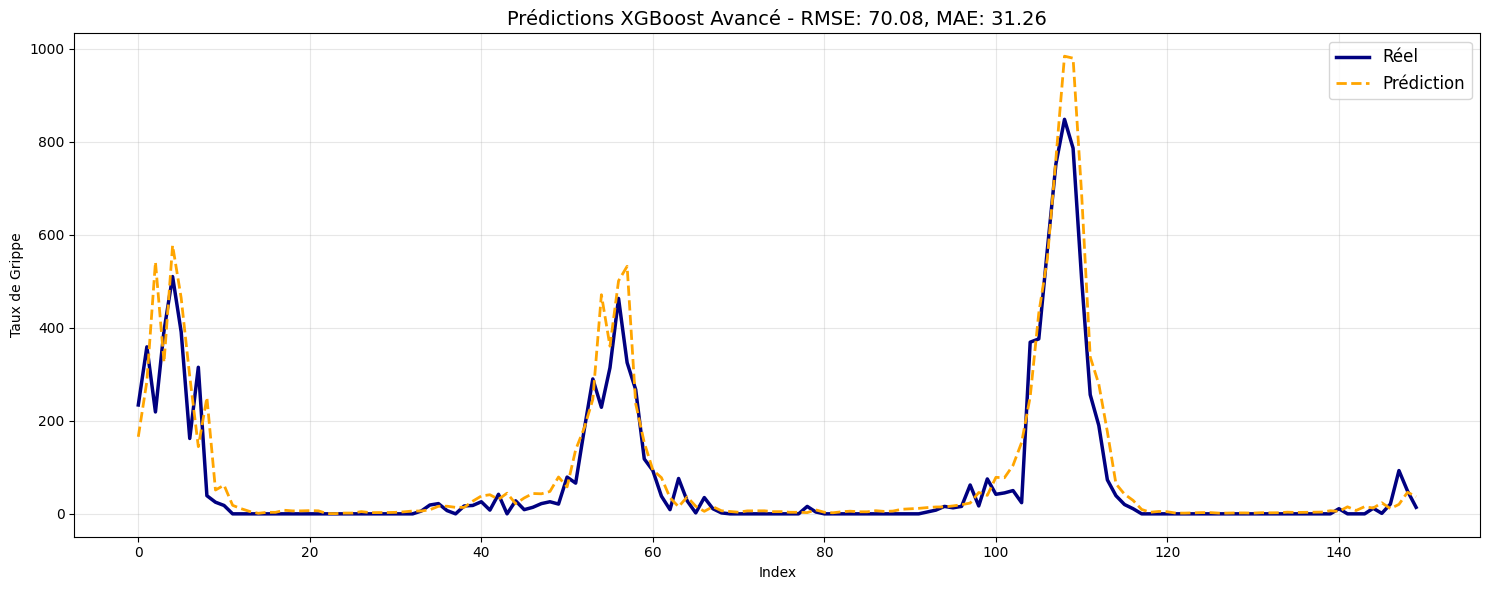


📈 TOP 15 FEATURES LES PLUS IMPORTANTES
                                                                           feature  importance
                                                                   Lag1_x_humidity    0.325352
                                                                       Lag1_x_temp    0.160076
                                                                         Taux_Lag1    0.105139
                                                                          week_cos    0.044095
                                                         region_NORD-PAS-DE-CALAIS    0.020813
                                                            region_BASSE-NORMANDIE    0.015191
                                                                       temp_x_week    0.012035
                                                                          week_sin    0.010536
requete_grippe_aviaire_vaccin_porcine_porc_H1N1_AH1N1_A_mexicaine_Mexique_pandemie    0.010064
          

In [36]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# =========================
# 1) CHARGEMENT
# =========================
print("Chargement des données...")
train_df = pd.read_csv("train_full.csv")
test_df  = pd.read_csv("test_full.csv")

train_df = train_df.drop(columns=["TauxGrippe_google"], errors="ignore")
test_df  = test_df.drop(columns=["TauxGrippe_google"], errors="ignore")

test_df["TauxGrippe"] = np.nan
df = pd.concat([train_df, test_df], ignore_index=True)

print(f"Train: {train_df.shape}, Test: {test_df.shape}")
print(f"Colonnes disponibles: {df.columns.tolist()}")

# =========================
# 2) FEATURE ENGINEERING AVANCÉ
# =========================
print("\n" + "="*70)
print("🔧 FEATURE ENGINEERING AVANCÉ")
print("="*70)

df["year"] = df["week"].astype(str).str[:4].astype(int)
df["week_num"] = df["week"].astype(str).str[4:].astype(int)

# Tri crucial
df = df.sort_values(["region_name", "week"]).reset_index(drop=True)

# --- A) LAGS DE LA CIBLE ---
print("\n1️⃣  Création des lags de TauxGrippe...")
for lag in [1, 2, 3, 4]:
    df[f"Taux_Lag{lag}"] = df.groupby("region_name")["TauxGrippe"].shift(lag)

# Rolling features sur la cible
df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).mean()
)
df["Taux_Rolling7"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)
df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
    lambda x: x.rolling(3, min_periods=1).std()
)

# --- B) LAGS DES VARIABLES MÉTÉO ---
print("2️⃣  Création des lags météo (t, pmer, ff, rr24, u)...")
meteo_vars = ["t", "pmer", "ff", "rr24", "u"]

for var in meteo_vars:
    if var in df.columns:
        # Lag 1 et 2 semaines
        df[f"{var}_Lag1"] = df.groupby("region_name")[var].shift(1)
        df[f"{var}_Lag2"] = df.groupby("region_name")[var].shift(2)
        
        # Moyenne mobile météo
        df[f"{var}_Rolling3"] = df.groupby("region_name")[var].transform(
            lambda x: x.rolling(3, min_periods=1).mean()
        )

# --- C) INTERACTIONS IMPORTANTES ---
print("3️⃣  Création d'interactions...")

# Interaction grippe × saisonnalité
df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]

# Interaction grippe × température
if "t" in df.columns:
    df["Lag1_x_temp"] = df["Taux_Lag1"] * df["t"]
    df["temp_x_week"] = df["t"] * df["week_num"]  # Froid hivernal

# Interaction grippe × humidité
if "u" in df.columns:
    df["Lag1_x_humidity"] = df["Taux_Lag1"] * df["u"]

# Interaction grippe × requêtes Google
if "requete_grippe" in df.columns:
    df["Lag1_x_requete"] = df["Taux_Lag1"] * df["requete_grippe"]

# --- D) FEATURES SAISONNIÈRES ---
print("4️⃣  Features saisonnières cycliques...")

# Sin/Cos pour capturer la cyclicité
df["week_sin"] = np.sin(2 * np.pi * df["week_num"] / 52)
df["week_cos"] = np.cos(2 * np.pi * df["week_num"] / 52)

# Indicateur hiver (semaines 48-52 et 1-12)
df["is_winter"] = ((df["week_num"] >= 48) | (df["week_num"] <= 12)).astype(int)

# --- E) FEATURES DÉMOGRAPHIQUES ---
print("5️⃣  Features démographiques...")

# Proportion de personnes âgées (plus vulnérables)
if all(col in df.columns for col in ["pop_60_74", "pop_75_plus", "pop_total"]):
    df["prop_elderly"] = (df["pop_60_74"] + df["pop_75_plus"]) / (df["pop_total"] + 1)

# Proportion jeunes
if all(col in df.columns for col in ["pop_0_19", "pop_total"]):
    df["prop_young"] = df["pop_0_19"] / (df["pop_total"] + 1)

# --- F) FEATURES MÉTÉO DÉRIVÉES ---
print("6️⃣  Features météo dérivées...")

# Variation de température (chocs thermiques favorisent la grippe)
if "t" in df.columns:
    df["temp_diff"] = df.groupby("region_name")["t"].diff()
    df["temp_variation"] = df.groupby("region_name")["t"].transform(
        lambda x: x.rolling(3, min_periods=1).std()
    )

# Indice de confort (température + humidité)
if "t" in df.columns and "u" in df.columns:
    df["comfort_index"] = df["t"] - (0.55 - 0.0055 * df["u"]) * (df["t"] - 14.5)

# --- G) ENCODAGE RÉGION ---
print("7️⃣  Encodage des régions...")
region_dummies = pd.get_dummies(df["region_name"], prefix="region", drop_first=True)
df = pd.concat([df, region_dummies], axis=1)

print(f"\n✅ Feature Engineering terminé! Total colonnes: {df.shape[1]}")

# =========================
# 3) SÉLECTION DES FEATURES
# =========================
exclude_cols = [
    "Id", "week", "TauxGrippe", "TauxGrippe_google",
    "region_name", "region_code", "week_date", "month_date", "month", "Id_google"
]
features = [c for c in df.columns if c not in exclude_cols]

print(f"Nombre de features finales: {len(features)}")

# Vérifier les NaN
print(f"Lignes avec NaN avant drop: {df[features].isnull().any(axis=1).sum()}")

# =========================
# 4) TRAIN / VALID SPLIT
# =========================
train_mask = df["TauxGrippe"].notna() & df["Taux_Lag1"].notna()
train_data = df[train_mask].copy()

max_year = train_data["year"].max()
split_year = max_year - 1

X_train = train_data[train_data["year"] <= split_year][features]
y_train = train_data[train_data["year"] <= split_year]["TauxGrippe"]

X_val = train_data[train_data["year"] > split_year][features]
y_val = train_data[train_data["year"] > split_year]["TauxGrippe"]

print(f"\nTrain: {X_train.shape}, Validation: {X_val.shape}")

# =========================
# 5) ENTRAÎNEMENT XGBOOST
# =========================
print("\n" + "="*70)
print("🚀 ENTRAÎNEMENT XGBOOST AVEC FEATURES AVANCÉES")
print("="*70)

# Meilleurs params trouvés (Config 3 : bon compromis RMSE/MAE)
params = {
    "objective": "reg:squarederror",
    "max_depth": 7,
    "learning_rate": 0.04,
    "n_estimators": 600,
    "min_child_weight": 2,
    "subsample": 0.85,
    "colsample_bytree": 0.85,
    "gamma": 0.1,
    "reg_alpha": 0.05,
    "reg_lambda": 1.0,
    "random_state": 42,
    "n_jobs": -1
}

model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train, verbose=0)

# =========================
# 6) ÉVALUATION
# =========================
val_preds = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_preds))
mae = mean_absolute_error(y_val, val_preds)

print(f"\n{'='*70}")
print(f"📊 RÉSULTATS SUR VALIDATION")
print(f"{'='*70}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE:  {mae:.2f}")

# Visualisation
plt.figure(figsize=(15, 6))
plt.plot(y_val.values[:150], label="Réel", linewidth=2.5, color='navy')
plt.plot(val_preds[:150], label="Prédiction", linestyle="--", linewidth=2, color='orange')
plt.title(f"Prédictions XGBoost Avancé - RMSE: {rmse:.2f}, MAE: {mae:.2f}", fontsize=14)
plt.xlabel("Index")
plt.ylabel("Taux de Grippe")
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Feature Importance
importance_df = pd.DataFrame({
    "feature": features,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

print(f"\n{'='*70}")
print("📈 TOP 15 FEATURES LES PLUS IMPORTANTES")
print(f"{'='*70}")
print(importance_df.head(15).to_string(index=False))

# =========================
# 7) PRÉDICTION RÉCURSIVE
# =========================
print(f"\n{'='*70}")
print("🔮 PRÉDICTION RÉCURSIVE SUR TEST")
print(f"{'='*70}")

test_weeks = sorted(test_df["week"].unique())
print(f"Prédiction pour {len(test_weeks)} semaines...\n")

for i, week in enumerate(test_weeks, 1):
    # Recalcul de TOUTES les features dépendantes des lags
    
    # Lags cible
    for lag in [1, 2, 3, 4]:
        df[f"Taux_Lag{lag}"] = df.groupby("region_name")["TauxGrippe"].shift(lag)
    
    df["Taux_Rolling3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).mean()
    )
    df["Taux_Rolling7"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(7, min_periods=1).mean()
    )
    df["Taux_Rolling_std3"] = df.groupby("region_name")["Taux_Lag1"].transform(
        lambda x: x.rolling(3, min_periods=1).std()
    )
    
    # Lags météo
    for var in meteo_vars:
        if var in df.columns:
            df[f"{var}_Lag1"] = df.groupby("region_name")[var].shift(1)
            df[f"{var}_Lag2"] = df.groupby("region_name")[var].shift(2)
            df[f"{var}_Rolling3"] = df.groupby("region_name")[var].transform(
                lambda x: x.rolling(3, min_periods=1).mean()
            )
    
    # Interactions
    df["Lag1_x_week"] = df["Taux_Lag1"] * df["week_num"]
    if "t" in df.columns:
        df["Lag1_x_temp"] = df["Taux_Lag1"] * df["t"]
        df["temp_x_week"] = df["t"] * df["week_num"]
    if "u" in df.columns:
        df["Lag1_x_humidity"] = df["Taux_Lag1"] * df["u"]
    if "requete_grippe" in df.columns:
        df["Lag1_x_requete"] = df["Taux_Lag1"] * df["requete_grippe"]
    
    # Météo dérivées
    if "t" in df.columns:
        df["temp_diff"] = df.groupby("region_name")["t"].diff()
        df["temp_variation"] = df.groupby("region_name")["t"].transform(
            lambda x: x.rolling(3, min_periods=1).std()
        )
    if "t" in df.columns and "u" in df.columns:
        df["comfort_index"] = df["t"] - (0.55 - 0.0055 * df["u"]) * (df["t"] - 14.5)
    
    # Prédire la semaine courante
    current_mask = (df["week"] == week)
    X_current = df.loc[current_mask, features].copy()
    
    if X_current.isnull().any().any():
        X_current = X_current.fillna(0)
    
    y_pred = model.predict(X_current)
    y_pred = np.maximum(y_pred, 0)
    
    df.loc[current_mask, "TauxGrippe"] = y_pred
    
    if i % 20 == 0:
        print(f"  ✓ Semaine {week} ({i}/{len(test_weeks)}) - moyenne: {y_pred.mean():.1f}")

print("\n✅ Prédiction terminée!")

# =========================
# 8) SUBMISSION
# =========================
print(f"\n{'='*70}")
print("💾 CRÉATION DE LA SUBMISSION")
print(f"{'='*70}")

submission = df[df["week"].isin(test_weeks)][["Id", "TauxGrippe"]].copy()
submission["Id"] = submission["Id"].astype(int)
submission = submission.sort_values("Id")

submission.to_csv("submission_xgboost_advanced.csv", index=False)

print(f"\n✅ Fichier sauvegardé: submission_xgboost_advanced.csv")
print(f"   Shape: {submission.shape}")
print(f"   Min: {submission['TauxGrippe'].min():.2f}")
print(f"   Max: {submission['TauxGrippe'].max():.2f}")
print(f"   Mean: {submission['TauxGrippe'].mean():.2f}")
print(f"   Median: {submission['TauxGrippe'].median():.2f}")

print("\n" + "="*70)
print("Aperçu:")
print(submission.head(10))
print("\n🎉 TERMINÉ!")